## Contents

### Indexing

### Time Series Plotting

### Decomposition

### Auto Correlation

### Time Series Shifting

## 6.6 Sourcing & Analyzing Time Series Data - Fluid Lab Revenue 2021-2023

In [1]:
# Importing Libraries and Data Set
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
# Making Path do data as a string
path = r'C:\Users\bbissonette\Documents\Data Analytics Course\Acheivement 6'

In [3]:
# Importing Fluid_Lab_Invoicing_Raw data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'invoicing_clean_time_series.csv'), index_col = False)

In [4]:
df.head(5)

,date,revenue
0,2021-01-04,50.0
1,2021-01-11,7454.0
2,2021-01-13,123202.0
3,2021-01-14,61121.0
4,2021-01-15,25807.0


In [5]:
df.shape

(670, 2)

In [6]:
df.columns

Index(['date', 'revenue'], dtype='object')

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df['date_time'] = pd.to_datetime(df['date'])
df = df.set_index('date_time')
df.drop(['date'], axis=1, inplace=True)
df.head()

,revenue
date_time,
2021-01-04,50.0
2021-01-11,7454.0
2021-01-13,123202.0
2021-01-14,61121.0
2021-01-15,25807.0


In [24]:
df.columns

Index(['revenue'], dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 670 entries, 2021-01-04 to 2023-11-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  670 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


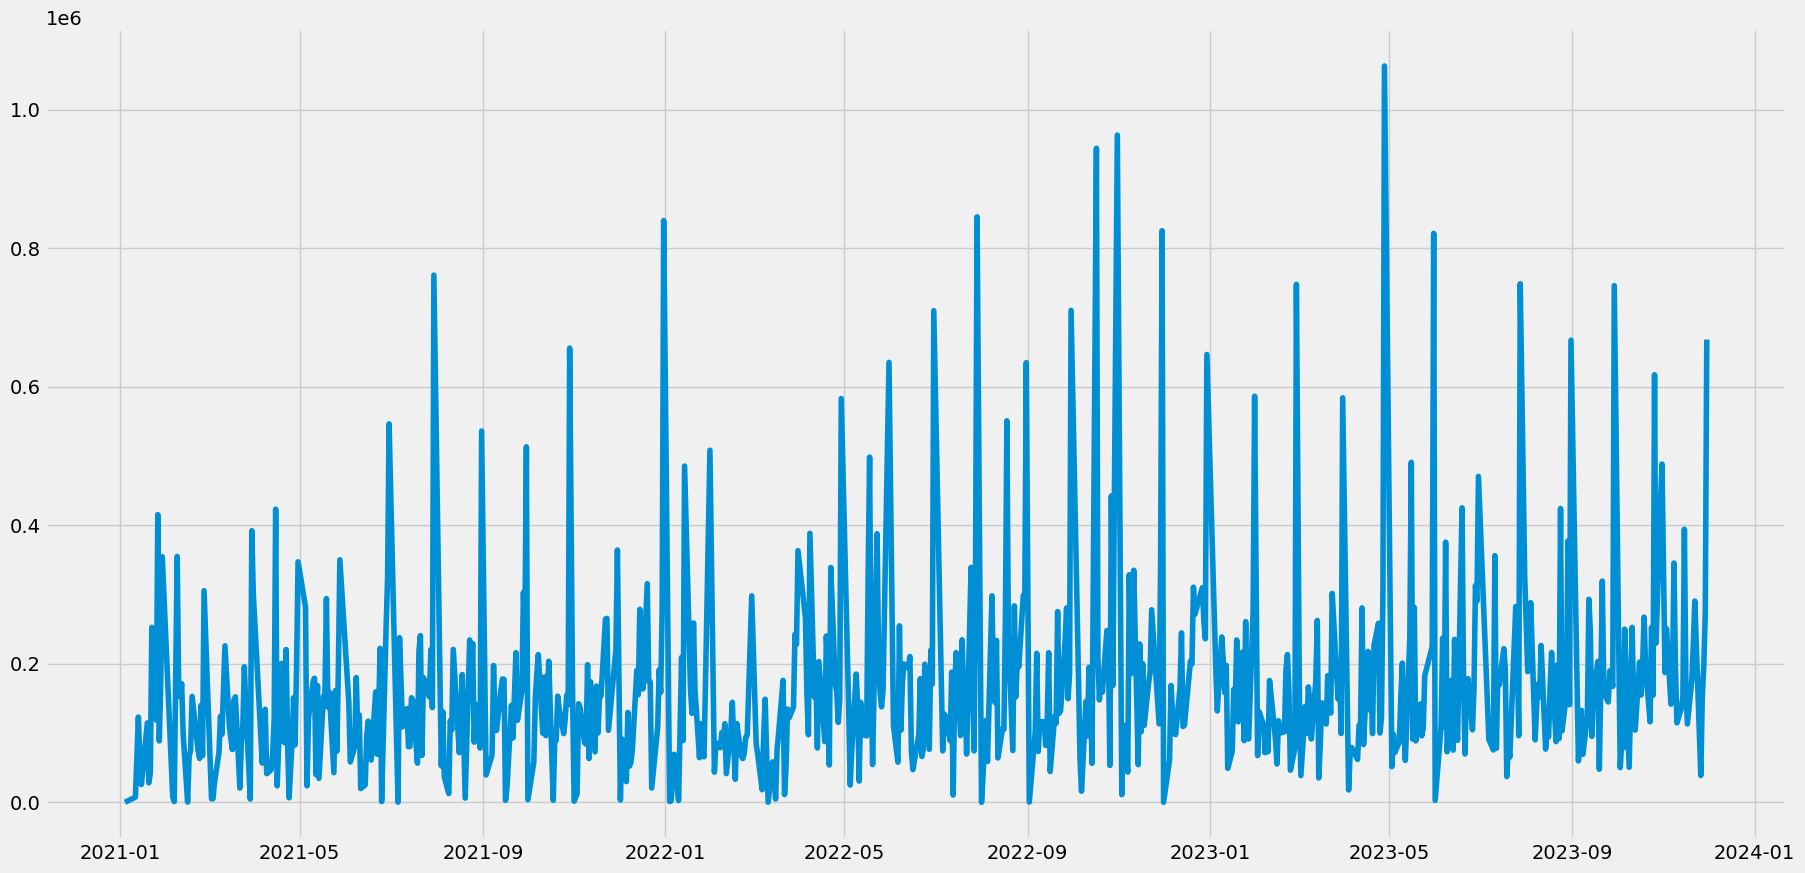

In [9]:
# Plot the data using matplotlib.
plt.figure(figsize=(20,10), dpi=100) 
plt.plot(df)

In [10]:
df.isnull().sum() 

revenue    0
dtype: int64

In [11]:
dups = df.duplicated()
dups.sum()

0

### Decomposition

In [28]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model= 'additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

In [14]:
# Plot the separate components
decomposition.plot()
plt.show()

NameError: name 'decomposition' is not defined

## Dickey Fuller Test

In [15]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['revenue'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.862116
p-value                          0.049934
Number of Lags Used             20.000000
Number of Observations Used    649.000000
Critical Value (1%)             -3.440466
Critical Value (5%)             -2.866004
Critical Value (10%)            -2.569147
dtype: float64


This does show stationarity but i will run 1 round of differencing to increase the difference.

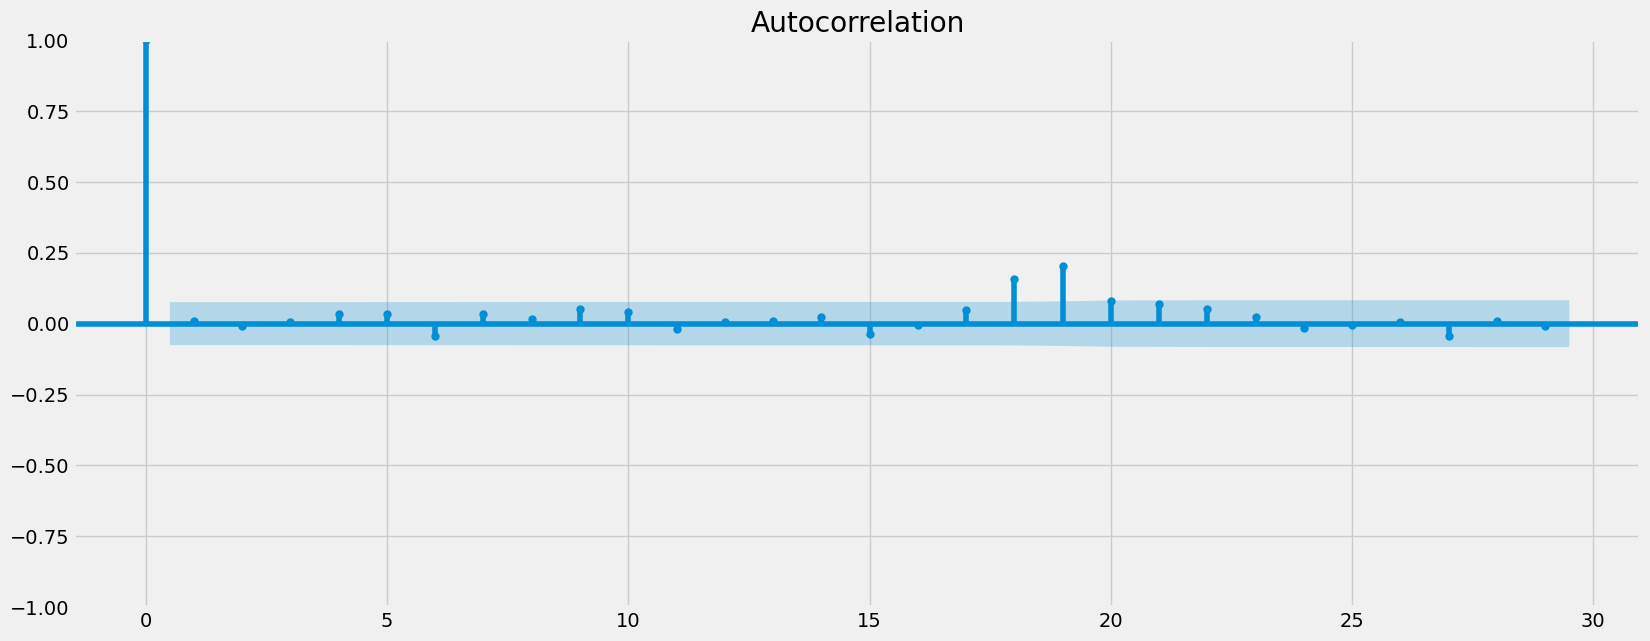

In [16]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

In [17]:
# shifting data 1 value
data_diff = df - df.shift(1)

In [18]:
data_diff.dropna(inplace = True)

In [19]:
data_diff.head()

,revenue
date_time,
2021-01-11,7404.0
2021-01-13,115748.0
2021-01-14,-62081.0
2021-01-15,-35314.0
2021-01-19,88937.0


In [20]:
data_diff.columns

Index(['revenue'], dtype='object')

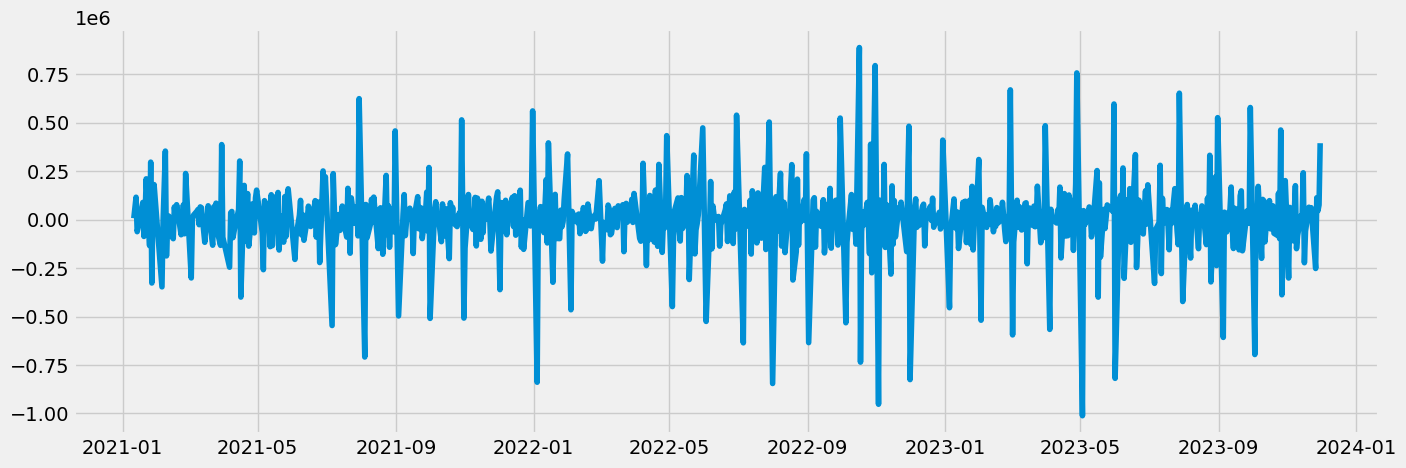

In [21]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [22]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.241172e+01
p-value                        4.328765e-23
Number of Lags Used            2.000000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


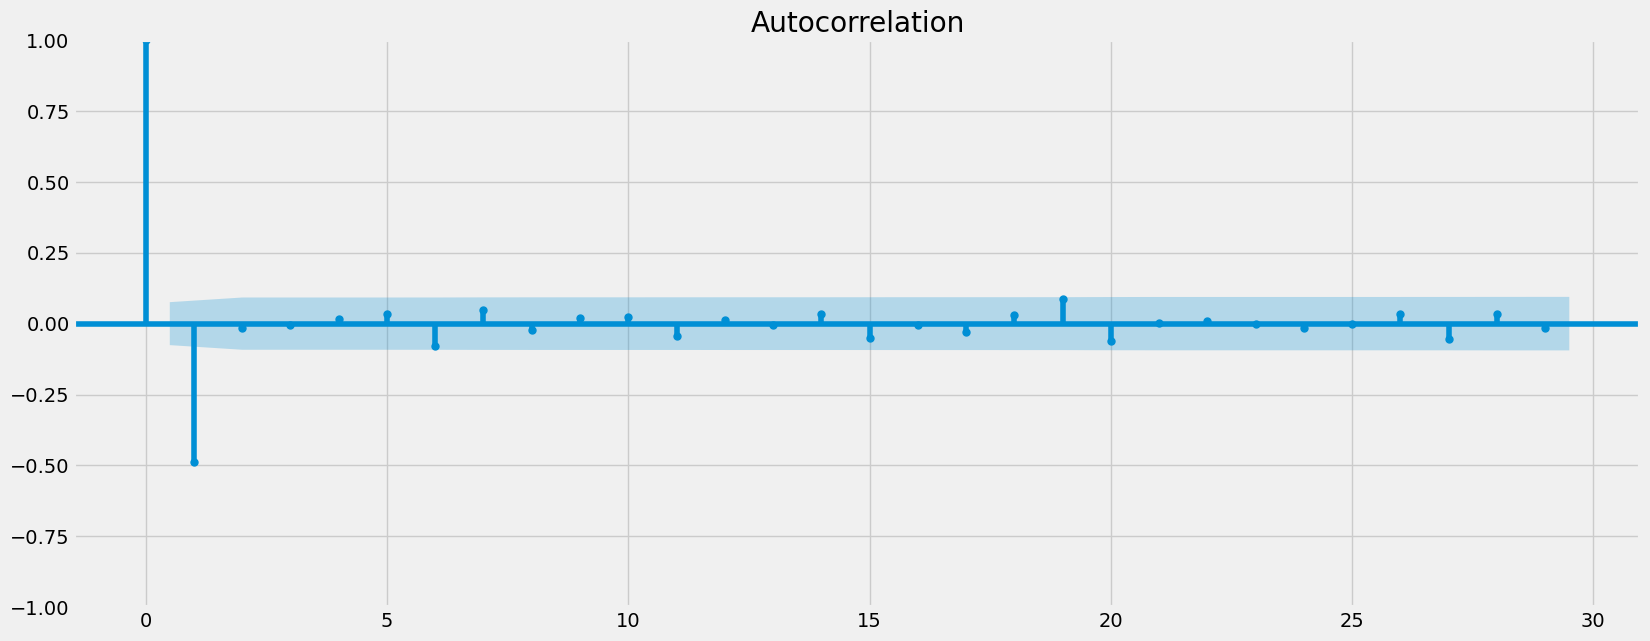

In [23]:
plot_acf(data_diff)
plt.show()

Stationarity Acheived and p-value very far away from .05.